### 0/ Import

In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess, split and metric
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# classifier algo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#random
np.random.seed(42)
import random
random.seed(42)

# Settings
import warnings
warnings.filterwarnings("ignore")
import time
pd.set_option('display.max_columns', None)


In [2]:
# deep learning algo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import backend
# Fixing the seed for random number generators
tf.random.set_seed(42)

# dask

# kera tuner

#### Metric score function

In [3]:
# Database to store result
df_accuracy = pd.DataFrame(columns=['Set', 'Model name', 'Model arch.', 'Train Accuracy', 'Test_Accuracy', 'Time'])

In [4]:
# Database to store result
df_accuracy = pd.DataFrame(columns=['Set', 'Model name', 'Model arch.', 'Train Accuracy', 'Test_Accuracy', 'Time'])

In [5]:
# Base models
def model_performance(Xset,name, model):
    start = time.time()
    
    # fit and make prediction 
    model.fit(X_train,y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    # calculate accuracy
    accuracy_train = round(accuracy_score(y_train, y_hat_train),5)
    accuracy_test = round(accuracy_score(y_test, y_hat_test),5)
    training_time = round(time.time()-start,2)
    
    # print result
    #print('Train Accuracy:', accuracy_train)
    #print('Test  Accuracy:', accuracy_test)
    #print('Training time:', training_time,'s')
    
    # store result
    df_accuracy.loc[len(df_accuracy.index)] = [Xset,name, model, accuracy_train, accuracy_test, training_time]
    return df_accuracy.loc[len(df_accuracy.index)-1]

#### Deep learning function

In [6]:
def accuracy_vs_epochs(history, from_epoc=20):
    df = pd.DataFrame(history.history).iloc[from_epoc:]
    plt.figure(figsize = (4,2))
    plt.plot(df['accuracy'])
    plt.plot(df['val_accuracy'])
    plt.xlim(left=from_epoc-2)
    plt.title('Accuracy vs Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

In [7]:
def dl_performance(Xset,name, model):
    y_hat_train = np.round(model.predict(X_train))
    y_hat_test = np.round(model.predict(X_test))
    
    # calculate accuracy
    accuracy_train = round(accuracy_score(y_train, y_hat_train),5)
    accuracy_test = round(accuracy_score(y_test, y_hat_test),5)
    
    # store result
    df_accuracy.loc[len(df_accuracy.index)] = [Xset,name, model, accuracy_train, accuracy_test, training_time]
    return df_accuracy.loc[len(df_accuracy.index)-1]

#### Data

In [8]:
df = pd.read_csv('2.0 df_KNN_imputed.csv')
df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


### 1/ Prep

In [9]:
unnecessary_cols = ['ID']
df.drop(columns = unnecessary_cols, inplace=True)
df.head(1)

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0


In [10]:
#Convert rating to numeric first

standard_rating = ['Seat_Comfort',
                   'Arrival_Time_Convenient',
                   'Catering',
                   'Onboard_Wifi_Service',
                   'Onboard_Entertainment',
                   'Online_Support',
                   'Ease_of_Online_Booking',
                   'Onboard_Service',
                   'Legroom',
                   'Baggage_Handling',
                   'CheckIn_Service',
                   'Cleanliness',
                   'Online_Boarding']

for col in standard_rating:
    df[col].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
                    [5, 4, 3, 2, 1, 0], inplace = True)
df['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'], 
                                [5,4,3,2,1,0], inplace = True)
df.head(5)

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,2,Green Car,5,5,5,4,2,3,2,2,3,2,4,2,1,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0
1,0,1,Ordinary,5,1,2,4,1,4,4,5,2,1,2,4,4,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,2,Green Car,2,2,2,2,4,5,5,5,5,5,4,5,5,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,0,3,Ordinary,2,3,2,3,2,3,3,3,3,3,4,3,3,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,1,3,Ordinary,3,3,3,2,4,5,4,4,4,4,4,4,4,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [11]:
# Creating list of dummy columns
to_get_dummies1 = ['Seat_Class','Customer_Type','Type_Travel','Gender', 'Travel_Class',]

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies1, drop_first = True)  

In [12]:
df.head()

,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Class_Ordinary,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Gender_Male,Travel_Class_Eco
0,0,2,5,5,5,4,2,3,2,2,3,2,4,2,1,52.0,272,0.0,5.0,0,1,0,0,0
1,0,1,5,1,2,4,1,4,4,5,2,1,2,4,4,48.0,2200,9.0,0.0,1,1,1,1,1
2,1,2,2,2,2,2,4,5,5,5,5,5,4,5,5,43.0,1061,77.0,119.0,0,1,0,0,0
3,0,3,2,3,2,3,2,3,3,3,3,3,4,3,3,44.0,780,13.0,18.0,1,1,0,0,0
4,1,3,3,3,3,2,4,5,4,4,4,4,4,4,4,50.0,1981,0.0,0.0,1,1,0,0,0


### 2/ Split datasets

In [13]:
Y = df['Overall_Experience']

In [14]:
# X1 Age, Distance, Delays: keep as is
X1 = df.drop(columns = ['Overall_Experience'])

# X2 Age, Distance, Delays: manual transform

X2 = df.drop(columns = ['Overall_Experience'])
X2['Age'] = df['Age']/10
X2['Travel_Distance'] = np.sqrt(df['Travel_Distance'])
X2['Departure_Delay_in_Mins'][df['Departure_Delay_in_Mins']>0] = np.log(df['Departure_Delay_in_Mins'][df['Departure_Delay_in_Mins']>0])
X2['Arrival_Delay_in_Mins'][df['Arrival_Delay_in_Mins']>0] = np.log(df['Arrival_Delay_in_Mins'][df['Arrival_Delay_in_Mins']>0])

### Non neural models

In [15]:
KNN_model = KNeighborsClassifier(n_neighbors = 7)
DTree_model = DecisionTreeClassifier(random_state = 14)
RF_model = RandomForestClassifier(random_state = 14)
LG_model = LogisticRegression(random_state = 14)
SVM_linear = SVC(kernel='linear', random_state = 14)
SVM_rbf = SVC(kernel='rbf', random_state = 14)

### Loop through

In [16]:
X_list = [('X1',X1), ('X2', X2)]
model_list = [('DTree_model', DTree_model),
              ('RF_model', RF_model),
              ('KNN_model', KNN_model),
              ('LG_model', LG_model),
              ('SVM_linear', SVM_linear),
              ('SVM_rbf' ,SVM_rbf)]

In [17]:
%%time
# tree models
for model_name, model in model_list[:2]:
    for X_name, X in X_list:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14)
        print(model_performance(X_name, model_name, model))
        print('_'*80)

print('Done.')

Set                                                    X1
Model name                                    DTree_model
Model arch.       DecisionTreeClassifier(random_state=14)
Train Accuracy                                        1.0
Test_Accuracy                                     0.93357
Time                                                 0.44
Name: 0, dtype: object
________________________________________________________________________________
Set                                                    X2
Model name                                    DTree_model
Model arch.       DecisionTreeClassifier(random_state=14)
Train Accuracy                                        1.0
Test_Accuracy                                     0.93282
Time                                                 0.46
Name: 1, dtype: object
________________________________________________________________________________
Set                                                              X1
Model name                  

In [18]:
%%time
# logres and svm
for model_name, model in model_list[2:]:
    for X_name, X in X_list[-1:]:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14)
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        print(model_performance(X_name, model_name, model))
        print('_'*80)

print('Done.')

Set                                                X2
Model name                                  KNN_model
Model arch.       KNeighborsClassifier(n_neighbors=7)
Train Accuracy                                0.93266
Test_Accuracy                                  0.9164
Time                                             5.86
Name: 4, dtype: object
________________________________________________________________________________
Set                                                X2
Model name                                   LG_model
Model arch.       LogisticRegression(random_state=14)
Train Accuracy                                0.83366
Test_Accuracy                                 0.83784
Time                                             0.09
Name: 5, dtype: object
________________________________________________________________________________
Set                                                  X2
Model name                                   SVM_linear
Model arch.       SVC(kernel='li

### Loop through NN models

#### DL 1

Calculating for X1
590/590 [==============================] - 0s 710us/step
Set                                                              X1
Model name                                                     DL_1
Model arch.       <keras.engine.sequential.Sequential object at ...
Train Accuracy                                              0.89799
Test_Accuracy                                               0.90014
Time                                                         123.57
Name: 9, dtype: object


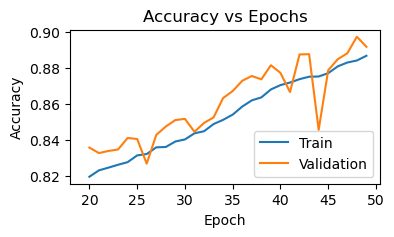

------------------------------------------------------------------------------------------
__________________________________________________________________________________________
Calculating for X2
590/590 [==============================] - 0s 711us/step
Set                                                              X2
Model name                                                     DL_1
Model arch.       <keras.engine.sequential.Sequential object at ...
Train Accuracy                                              0.94992
Test_Accuracy                                               0.94941
Time                                                         123.63
Name: 10, dtype: object


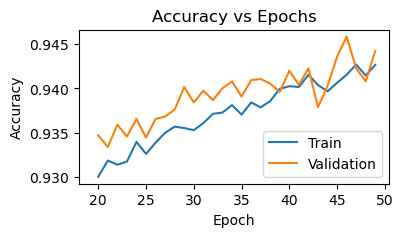

------------------------------------------------------------------------------------------
__________________________________________________________________________________________
Done


In [25]:
for X_name,X in X_list:
    X = X.values.astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14)
    print('Calculating for '+X_name)
    input_features = X_train.shape[1]
    start = time.time()

    DL_1 = Sequential()
    DL_1.add(Dense(128, activation='relu', input_shape=(input_features,)))
    DL_1.add(Dropout(0.2))
    DL_1.add(Dense(64, activation='relu'))
    DL_1.add(Dropout(0.1))
    DL_1.add(Dense(1, activation='sigmoid'))
    DL_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
    
    history = DL_1.fit(X_train, y_train, validation_split=0.1, epochs=50, verbose=0)
    training_time = round(time.time() - start,2)
    print(dl_performance(X_name, 'DL_1', DL_1))

    accuracy_vs_epochs(history,20)
    backend.clear_session()

    print('-'*90)
    print('_'*90)
print('Done')

#### DL 2 - 1 but with scaler

Calculating for X1
590/590 [==============================] - 0s 713us/step
Set                                                              X1
Model name                                                     DL_2
Model arch.       <keras.engine.sequential.Sequential object at ...
Train Accuracy                                              0.95974
Test_Accuracy                                               0.95476
Time                                                         123.46
Name: 13, dtype: object


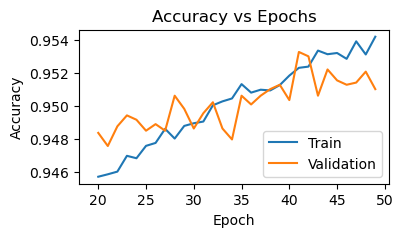

------------------------------------------------------------------------------------------
__________________________________________________________________________________________
Calculating for X2
590/590 [==============================] - 0s 705us/step
Set                                                              X2
Model name                                                     DL_2
Model arch.       <keras.engine.sequential.Sequential object at ...
Train Accuracy                                              0.96074
Test_Accuracy                                               0.95465
Time                                                         122.03
Name: 14, dtype: object


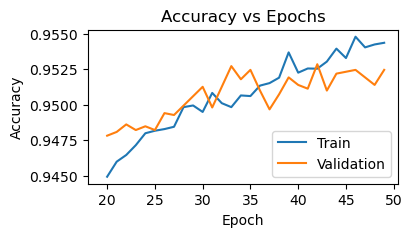

------------------------------------------------------------------------------------------
__________________________________________________________________________________________
Done


In [29]:
for X_name,X in X_list:
    X = X.values.astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14)
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    print('Calculating for '+X_name)
    input_features = X_train.shape[1]
    start = time.time()

    DL_2 = Sequential()
    DL_2.add(Dense(128, activation='relu', input_shape=(input_features,)))
    DL_2.add(Dropout(0.2))
    DL_2.add(Dense(64, activation='relu'))
    DL_2.add(Dropout(0.1))
    DL_2.add(Dense(1, activation='sigmoid'))
    DL_2.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
    
    history = DL_2.fit(X_train, y_train, validation_split=0.1, epochs=50, verbose=0)
    training_time = round(time.time() - start,2)
    print(dl_performance(X_name, 'DL_2', DL_2))

    accuracy_vs_epochs(history,20)
    backend.clear_session()

    print('-'*90)
    print('_'*90)
print('Done')

### Accuracy 

In [27]:
df_accuracy_copy = df_accuracy.copy()

In [38]:
df_accuracy[['Set', 'Model name', 'Train Accuracy', 'Test_Accuracy','Time']]

,Set,Model name,Train Accuracy,Test_Accuracy,Time
0,X1,KNN_model,0.78045,0.69713,6.26
1,X2,KNN_model,0.91738,0.89585,5.92
2,X1,DTree_model,1.00000,0.93357,0.44
3,X2,DTree_model,1.00000,0.93282,0.44
4,X1,RF_model,1.00000,0.95571,7.72
5,X2,RF_model,1.00000,0.95629,7.67
6,X2,LG_model,0.83366,0.83784,0.09
7,X2,SVM_linear,0.83793,0.84245,718.22
8,X2,SVM_rbf,0.94876,0.94432,241.36
9,X1,DL_1,0.89799,0.90014,123.57


### Key takeout:

- RF models has good accuracy despite overfitting, and very time efficient. With some tuning, this could potentially deliver good results. Also for RF model, data transforming/scaling isn't an issue. After this, I can look into XGB models as well.
- Deep learning models also have very good result on scaled data. Without scaling, manual data transform has better accuracy than leaving as is. This is a potential good direction as well.

=> Next step, try to tune some tree based models since they are relatively fast. After that, go on to tuning DL models as they are mostly guess work while taking a lot of time to do.